## Opening and CLosing

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path='images/lobster.png'

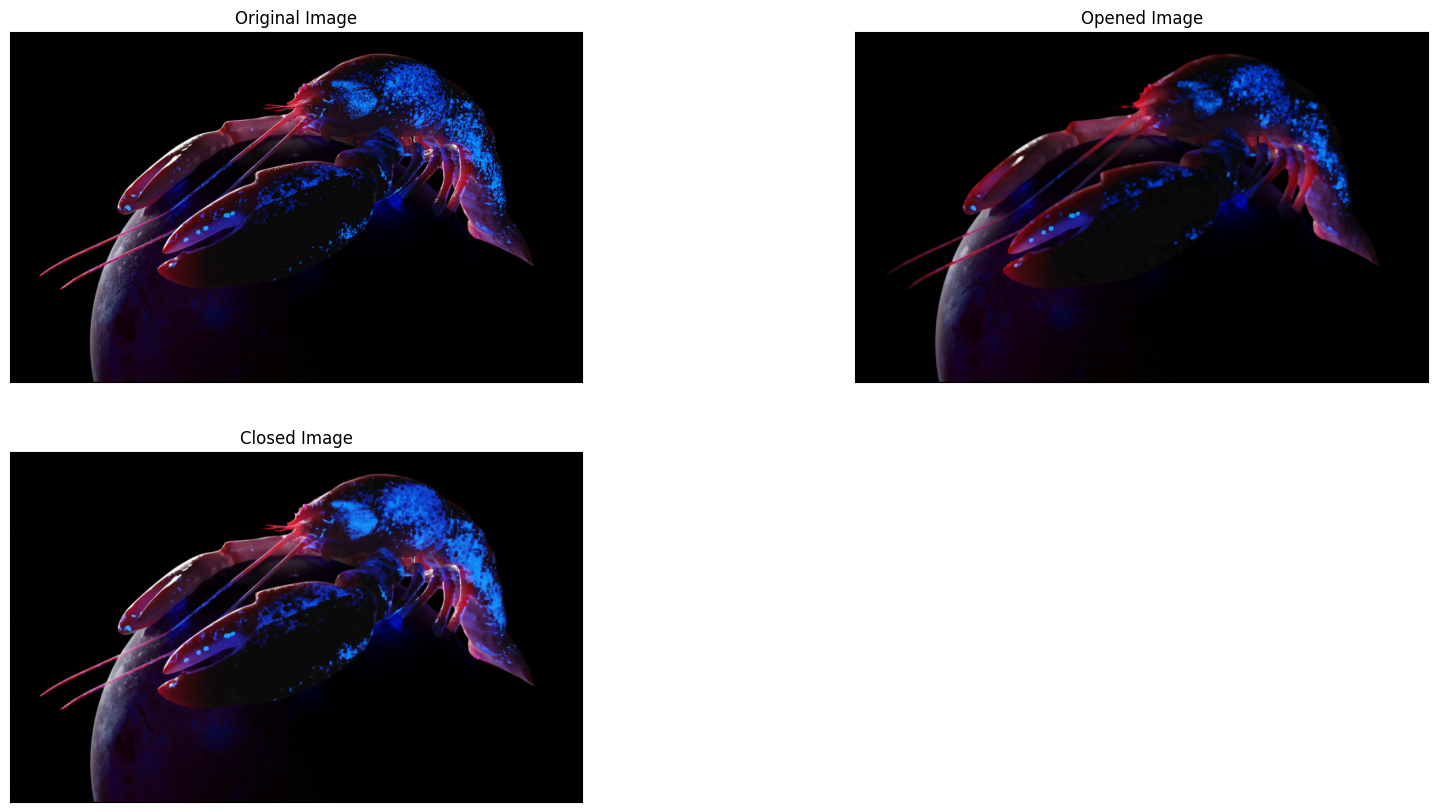

In [46]:


# Read a binary image
image = cv2.imread(image_path)

# Define a kernel (structuring element)
kernel = np.ones((6, 6), np.uint8)

# Perform opening operation
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Perform closing operation
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


# Display the original image, the opened image and the closed one
plt.figure(figsize=(20, 10))
plt.subplot(221), plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(opened_image)
plt.title('Opened Image'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(closed_image)
plt.title('Closed Image'), plt.xticks([]), plt.yticks([])


plt.show()

# Canny Edge Detection
### Algorithm:
1. Filter image with derivative of Gaussian
2. Find magnitude and orientation of gradient
3. Non-maximum suppression
4. Linking and thresholding (hysteresis)



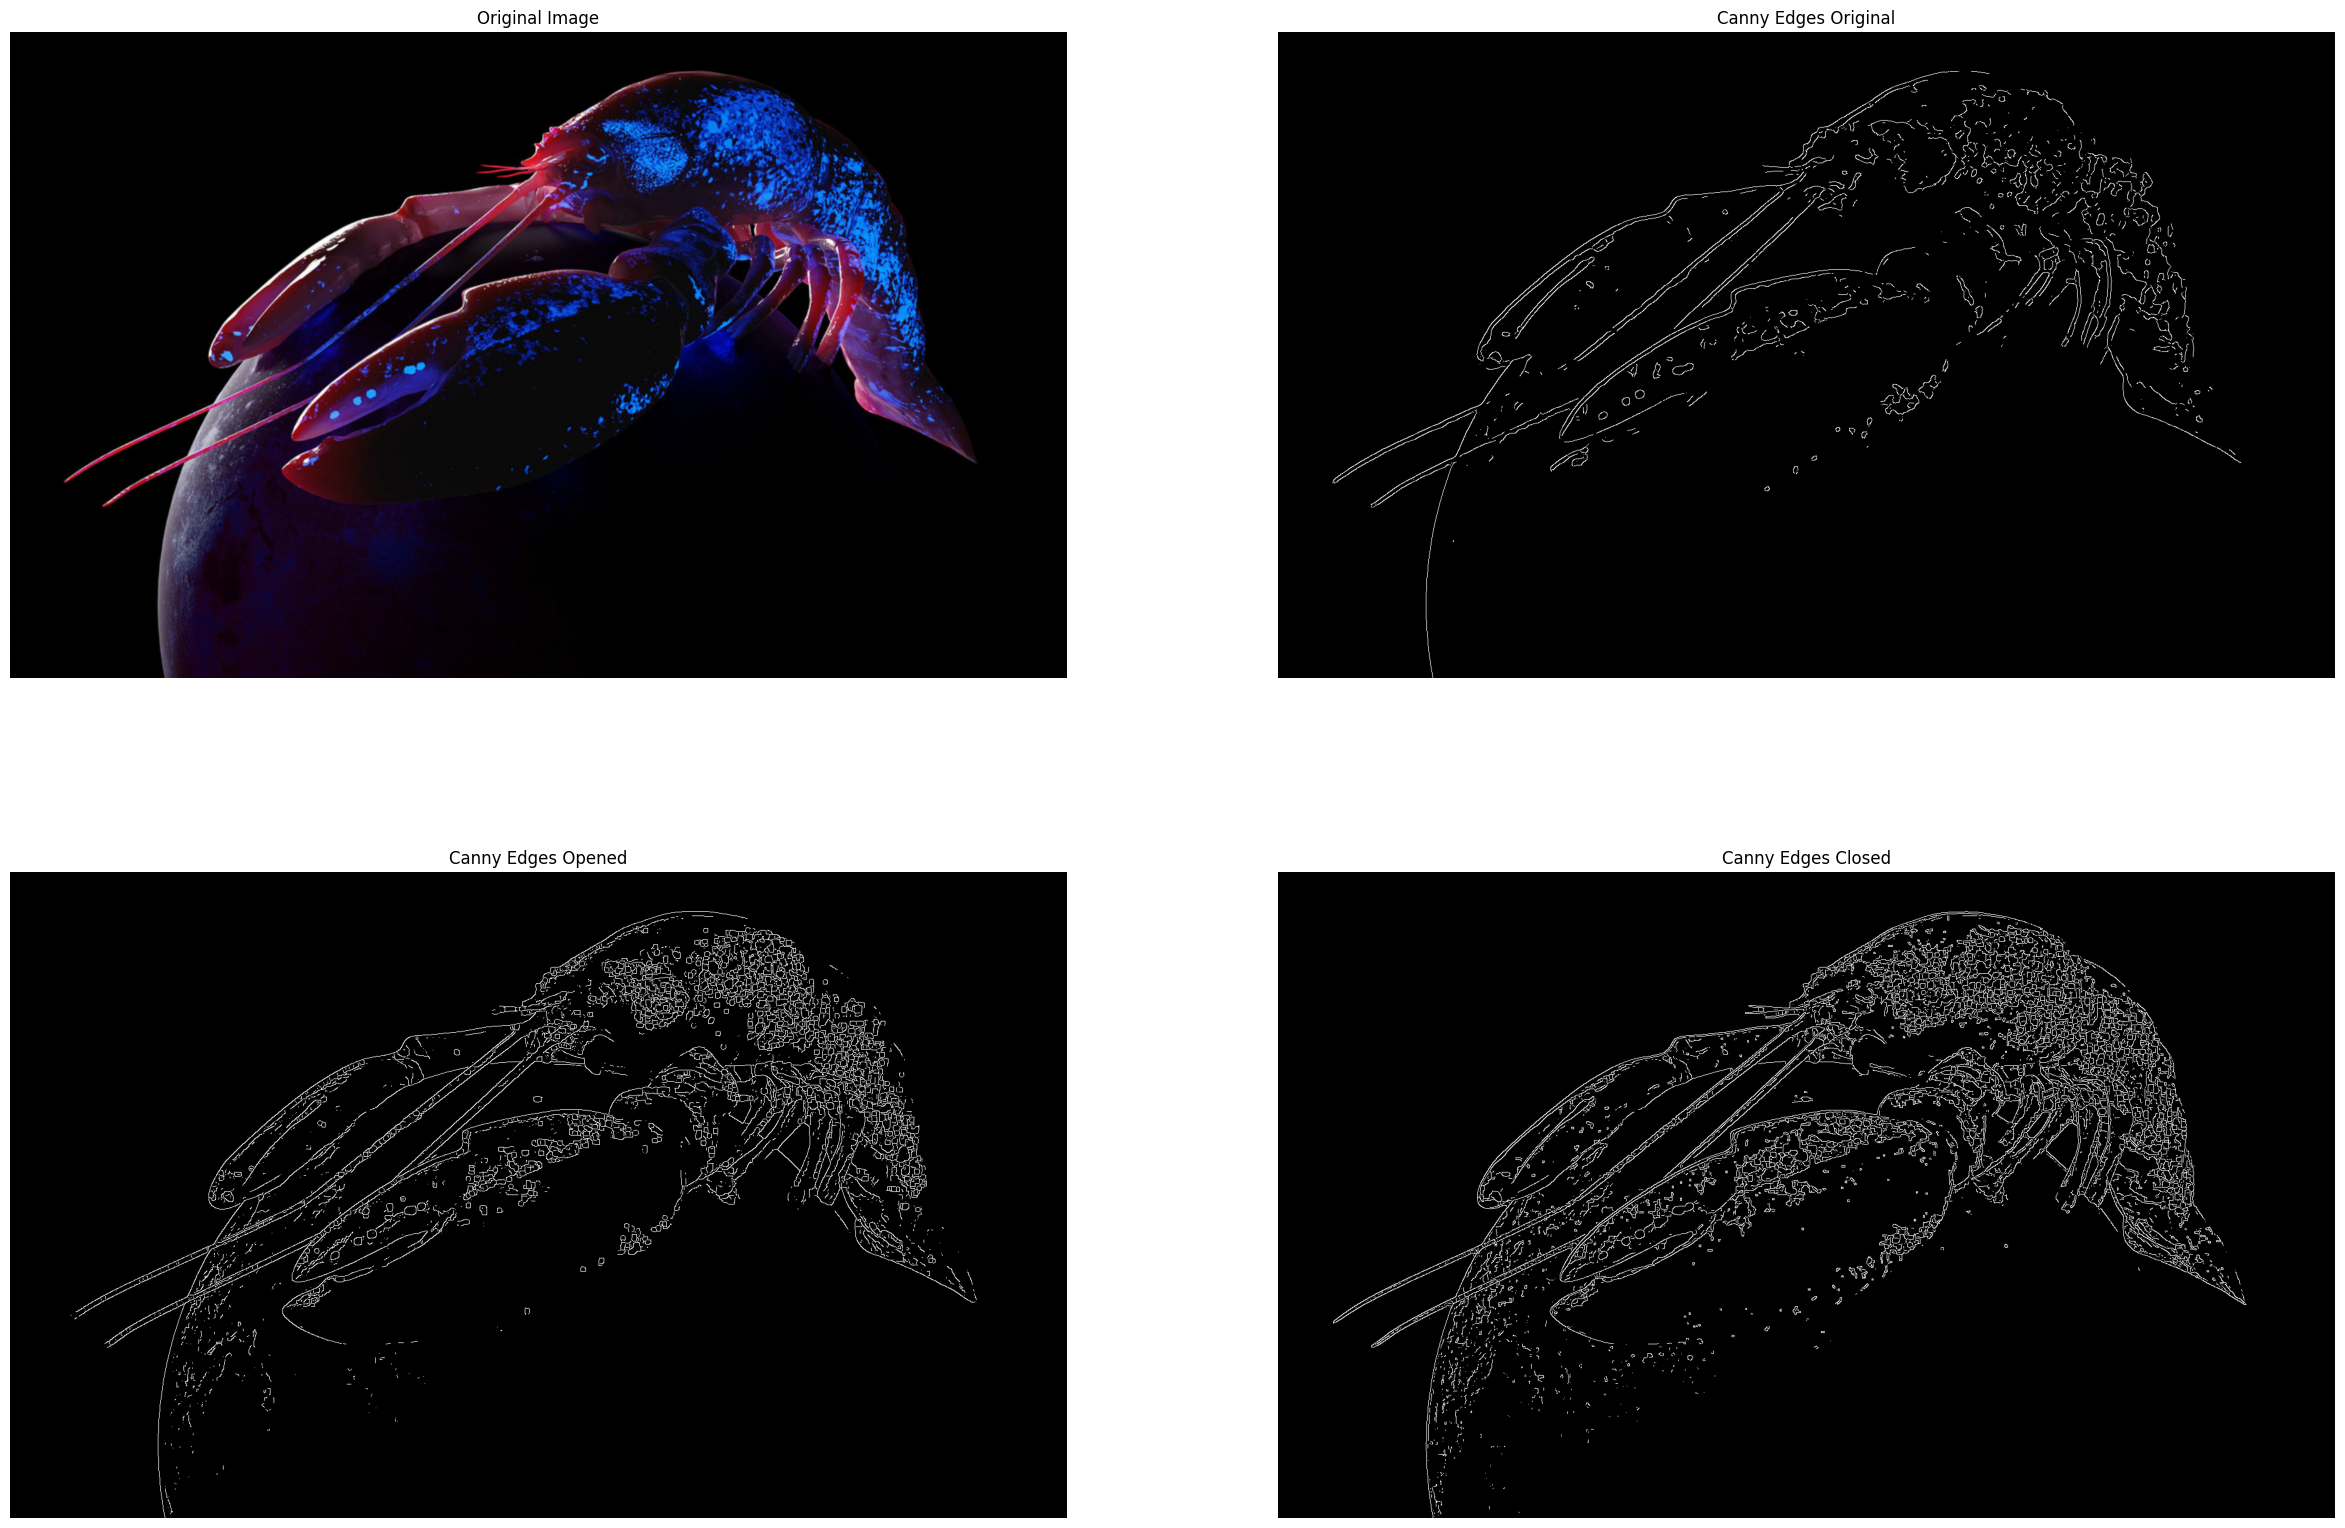

In [48]:
# to grayscale
imgGray = cv2.cvtColor(closed_image, cv2.COLOR_BGR2GRAY)

# guassian blur
imgBlur = cv2.GaussianBlur(imgGray, (13, 13), 0)

# Apply Canny edge detection
edges_original = cv2.Canny(image, threshold1=70, threshold2=70)
edges_opened = cv2.Canny(opened_image, threshold1=70, threshold2=70)
edges_closed = cv2.Canny(closed_image, threshold1=70, threshold2=70)


# Display the original image and the edges within the notebook
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1), plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')

plt.subplot(2,2,2), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges Original'), plt.xticks([]), plt.yticks([])
plt.axis('off')

plt.subplot(2,2,3), plt.imshow(edges_opened, cmap='gray')
plt.title('Canny Edges Opened'), plt.xticks([]), plt.yticks([])
plt.axis('off')

plt.subplot(2,2,4), plt.imshow(edges_closed, cmap='gray')
plt.title('Canny Edges Closed'), plt.xticks([]), plt.yticks([])
plt.axis('off')

plt.show()
